# Análise de series temporais

Dados de series temporais assumem cada vez mais importancia com a era da internet das coisas (IoT), da digitalizacao de sistemas de hospitais e das cidades inteligentes. Podemos esperar que dados dessa forma crescam exponencialmente com mais qualidade, quantidade e revelencia. 
Por esse motivo, cria-se uma demanda para o estudo e analise de dados de series temporais.


# Motivação e Importância

As séries temporais são um campo fascinante e em constante evolução da análise de dados.

Ao estudar séries temporais, é possível explorar conceitos complexos, como autocorrelação, estacionariedade, sazonalidade e modelos preditivos. Além disso, há uma grande variedade de técnicas disponíveis para análise de séries temporais, como ARIMA, modelos de suavização exponencial, redes neurais, entre outros.

# Objetivos

O objetivo deste trabalho é entender e aplicar técnicas de análise e modelagem para prever comportamentos futuros de uma série temporal de interesse. Para isso, serão explorados conceitos como autocorrelação, estacionariedade, sazonalidade e modelos preditivos, a fim de obter uma compreensão mais profunda dos dados.

# Revisão Bibliografica

## Datasets

- https://archive-beta.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

## Tutoriais

- https://towardsdatascience.com/5-types-of-plots-that-will-help-you-with-time-series-analysis-b63747818705
- https://youtu.be/vV12dGe_Fho
- https://youtu.be/z3ZnOW-S550
- https://youtu.be/xi0vhXFPegw

## Artigos

- https://arxiv.org/pdf/2004.13408.pdf
- https://arxiv.org/pdf/2205.13504v3.pdf

# Prerequisitos

Extrair o .zip que se encontra dentro da pasta data.

! unzip data/household_power_consumption.zip -d data/

# Base de dados

Essa base de dados contem 2075259 medidas coletadas em uma casa na cidade de Sceaux (7km de Paris) entre Dezembro de 2006 e Novembro de 2010.

In [6]:
# general
import pandas as pd
import numpy as np

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# settings
color_pal = sns.color_palette()

In [7]:
FILE_PATH = 'data/household_power_consumption.txt'

df = pd.read_csv(FILE_PATH, delimiter=';', dtype=str)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [8]:
def join_date_and_time(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    df = df.drop(['Time'], axis=1)
    return df

In [9]:
df = join_date_and_time(df)

In [10]:
df = df.set_index('Date')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


# Tratamento dos dados

In [11]:
def clean(df):
    df = df.copy()
    for col in df.columns:
        df = df[~df[col].str.contains('?', regex=False)]
        df[col] = pd.to_numeric(df[col])
    return df

In [12]:
df = clean(df)

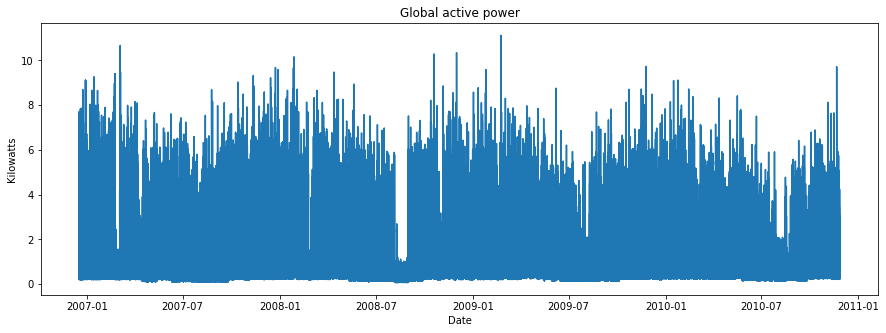

In [13]:
plt.figure(figsize=(15,5))
plt.title('Global active power')
plt.plot(df.index, df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.show()

# Dados a serem analisados

Será feito uma analise nos dados de 2007.

In [14]:
df = df.loc['2007-01-01':'2007-12-31']

In [15]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,521669,521669,521669,521669,521669,521669,521669
mean,1.11701,0.117365,239.384,4.7645,1.23172,1.63774,5.79456
std,1.16203,0.108296,3.55854,4.90575,6.45555,6.73114,8.18654
min,0.082,0,223.49,0.4,0,0,0
25%,0.278,0,236.94,1.2,0,0,0
50%,0.504,0.1,239.74,2.4,0,0,0
75%,1.548,0.186,241.84,6.4,0,1,17
max,10.67,1.148,252.14,46.4,78,78,20


<AxesSubplot:ylabel='Density'>

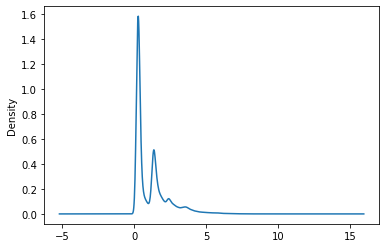

In [16]:
df['Global_active_power'].plot.kde()

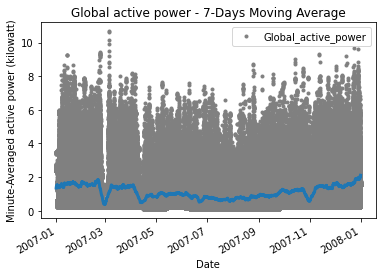

In [17]:
window = 24*60*7
df_gap = df[['Global_active_power']]

moving_average = df_gap.rolling(
    window=window,       # 7-day window
    center=True,
    min_periods=window//2,
).mean()

ax = df_gap.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Global active power - 7-Days Moving Average", legend=False, ylabel='Minute-Averaged active power (kilowatt)',
);

# Decomposição

Decompor a serie nos ajuda a entender como ela se encontra

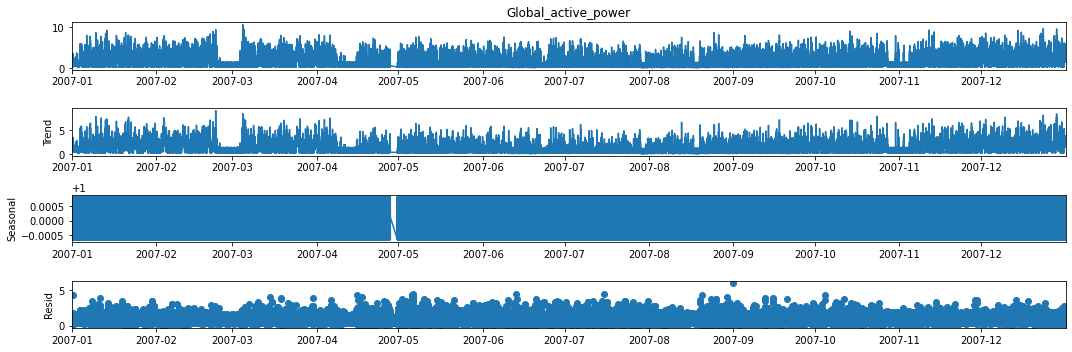

In [18]:
decomposition = seasonal_decompose(df['Global_active_power'], 
                                   model='multiplicative', 
                                   period=12)
fig = decomposition.plot();
fig.set_size_inches((15, 5))
fig.tight_layout()
plt.show()

# Sazonalidade

Vamos analisar se existem relações de tempo nesses dados

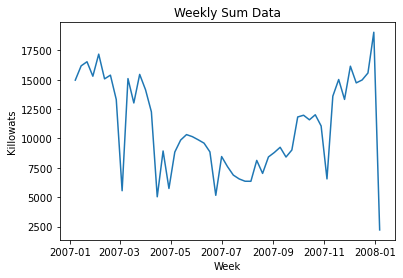

In [80]:
weekly_data = df.resample('W').sum()
weekly_data = weekly_data[['Global_active_power']]

plt.plot(weekly_data.index, weekly_data['Global_active_power'])
plt.xlabel('Week')
plt.ylabel('Killowats')
plt.title('Weekly Sum Data')
plt.show()

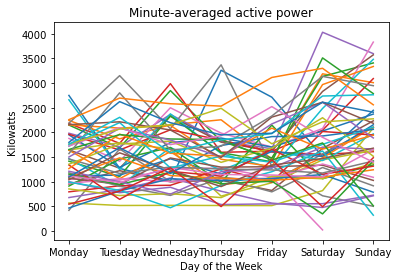

In [66]:
grouped_data = df.groupby(pd.Grouper(freq='W'))

# Loop through the groups and create a separate plot for each week
for name, group in grouped_data:
    # Resample the data to daily frequency for the current week
    weekly_data = group.resample('D').sum()
    
    # Create a plot for the current week
    plt.plot(weekly_data.index.day_name(), weekly_data['Global_active_power'])
    plt.xlabel('Day of the Week')
    plt.ylabel('Kilowatts')
    plt.title(f'Minute-averaged active power')
plt.show()

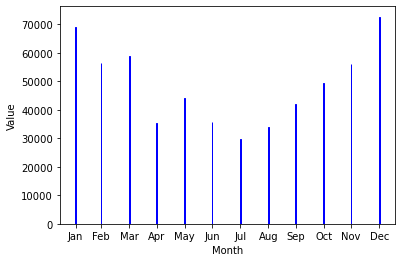

In [81]:
monthly_sum = df.groupby(pd.Grouper(freq='M'))['Global_active_power'].sum()

fig, ax = plt.subplots()
ax.bar(monthly_sum.index, monthly_sum.values, ec='blue')
ax.set_xticks(monthly_sum.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Value')
plt.show()

# Correlação

Existe uma correlação entre esses dados?